# Detecting anomalies in credit card transaction data (scikit-learn, xgboost, lgbm)

Description: Supervised classification procedure for detecting fraudulous credit card transactions in a large dataset.

Data: **PCA transformed credit card transaction data** collected in Europe over the course of two days. This anonymized dataset was created by Worldline and the Machine Learning Group of Université Libre de Bruxelles (http://mlg.ulb.ac.be). 

## 1) Data preparation

In [1]:
# Import modules
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
#import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Load data
df = pd.read_csv('./data/creditcard.csv')
# set to 3 decimal place
pd.set_option('precision', 3)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,...,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,284807.000,284807.000
mean,94813.860,3.920e-15,5.688e-16,-8.769e-15,2.782e-15,-1.553e-15,2.011e-15,-1.694e-15,-1.927e-16,-3.137e-15,...,1.537e-16,7.960e-16,5.368e-16,4.458e-15,1.453e-15,1.699e-15,-3.660e-16,-1.206e-16,88.350,0.002
std,47488.146,1.959e+00,1.651e+00,1.516e+00,1.416e+00,1.380e+00,1.332e+00,1.237e+00,1.194e+00,1.099e+00,...,7.345e-01,7.257e-01,6.245e-01,6.056e-01,5.213e-01,4.822e-01,4.036e-01,3.301e-01,250.120,0.042
min,0.000,-5.641e+01,-7.272e+01,-4.833e+01,-5.683e+00,-1.137e+02,-2.616e+01,-4.356e+01,-7.322e+01,-1.343e+01,...,-3.483e+01,-1.093e+01,-4.481e+01,-2.837e+00,-1.030e+01,-2.605e+00,-2.257e+01,-1.543e+01,0.000,0.000
25%,54201.500,-9.204e-01,-5.985e-01,-8.904e-01,-8.486e-01,-6.916e-01,-7.683e-01,-5.541e-01,-2.086e-01,-6.431e-01,...,-2.284e-01,-5.424e-01,-1.618e-01,-3.546e-01,-3.171e-01,-3.270e-01,-7.084e-02,-5.296e-02,5.600,0.000
50%,84692.000,1.811e-02,6.549e-02,1.798e-01,-1.985e-02,-5.434e-02,-2.742e-01,4.010e-02,2.236e-02,-5.143e-02,...,-2.945e-02,6.782e-03,-1.119e-02,4.098e-02,1.659e-02,-5.214e-02,1.342e-03,1.124e-02,22.000,0.000
75%,139320.500,1.316e+00,8.037e-01,1.027e+00,7.433e-01,6.119e-01,3.986e-01,5.704e-01,3.273e-01,5.971e-01,...,1.864e-01,5.286e-01,1.476e-01,4.395e-01,3.507e-01,2.410e-01,9.105e-02,7.828e-02,77.165,0.000
max,172792.000,2.455e+00,2.206e+01,9.383e+00,1.688e+01,3.480e+01,7.330e+01,1.206e+02,2.001e+01,1.559e+01,...,2.720e+01,1.050e+01,2.253e+01,4.585e+00,7.520e+00,3.517e+00,3.161e+01,3.385e+01,25691.160,1.000


In [3]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [4]:
# Print data types
print(df.dtypes)
print(df.columns)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
# Define X,y
X = df.iloc[:,:-2]
y = df.iloc[:,-1]

## 2) Visualization

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

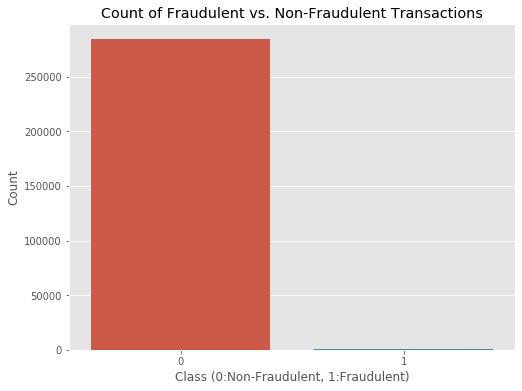

In [6]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

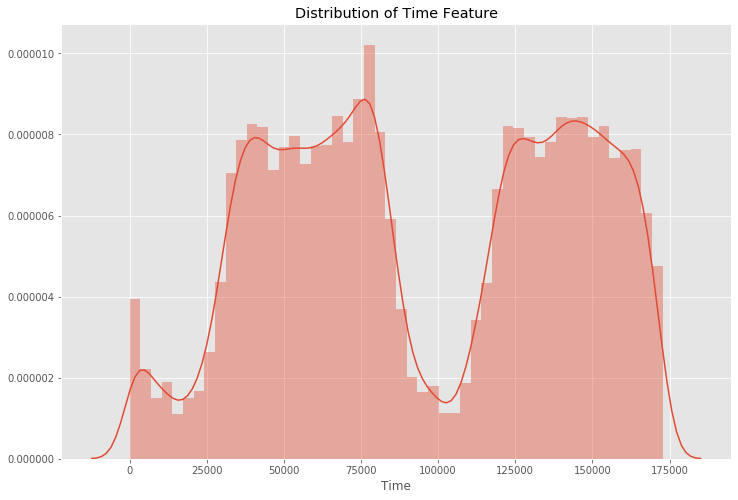

In [7]:
#visualizations of time and amount
plt.figure(figsize=(12,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

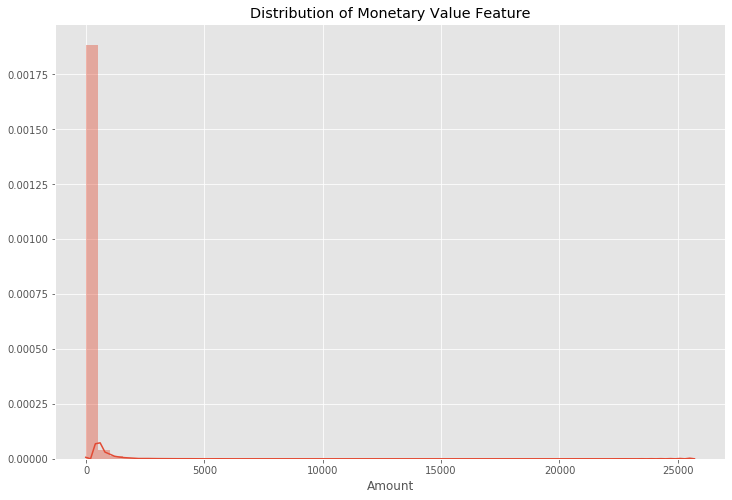

In [8]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [9]:
# find correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


In [10]:
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
           .stack()
           .sort_values(ascending=False))
sol

V7    Amount    0.397
V20   Amount    0.339
V6    Amount    0.216
Time  V5        0.173
V11   Class     0.155
                ...  
V14   Class    -0.303
V17   Class    -0.326
V5    Amount   -0.386
Time  V3       -0.420
V2    Amount   -0.531
Length: 465, dtype: float64

Text(0.5, 1, 'Heatmap of Correlation')

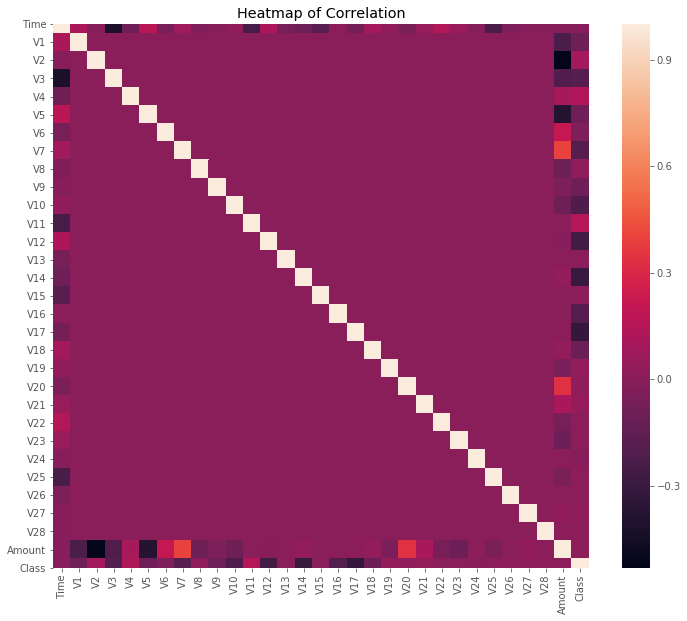

In [11]:
# heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [12]:
#taking a look at correlations once more
corr_class = corr[['Class']]
corr_class

,Class
Time,-1.232e-02
V1,-1.013e-01
V2,9.129e-02
V3,-1.930e-01
V4,1.334e-01
V5,-9.497e-02
V6,-4.364e-02
V7,-1.873e-01
V8,1.988e-02
V9,-9.773e-02


In [13]:
#negative correlations smaller than -0.2
corr_class[corr_class.Class < -0.2]

,Class
V10,-0.217
V12,-0.261
V14,-0.303
V17,-0.326


In [14]:
#positive correlations greater than 0.1
corr_class[corr_class.Class > 0.1]

,Class
V4,0.133
V11,0.155
Class,1.000


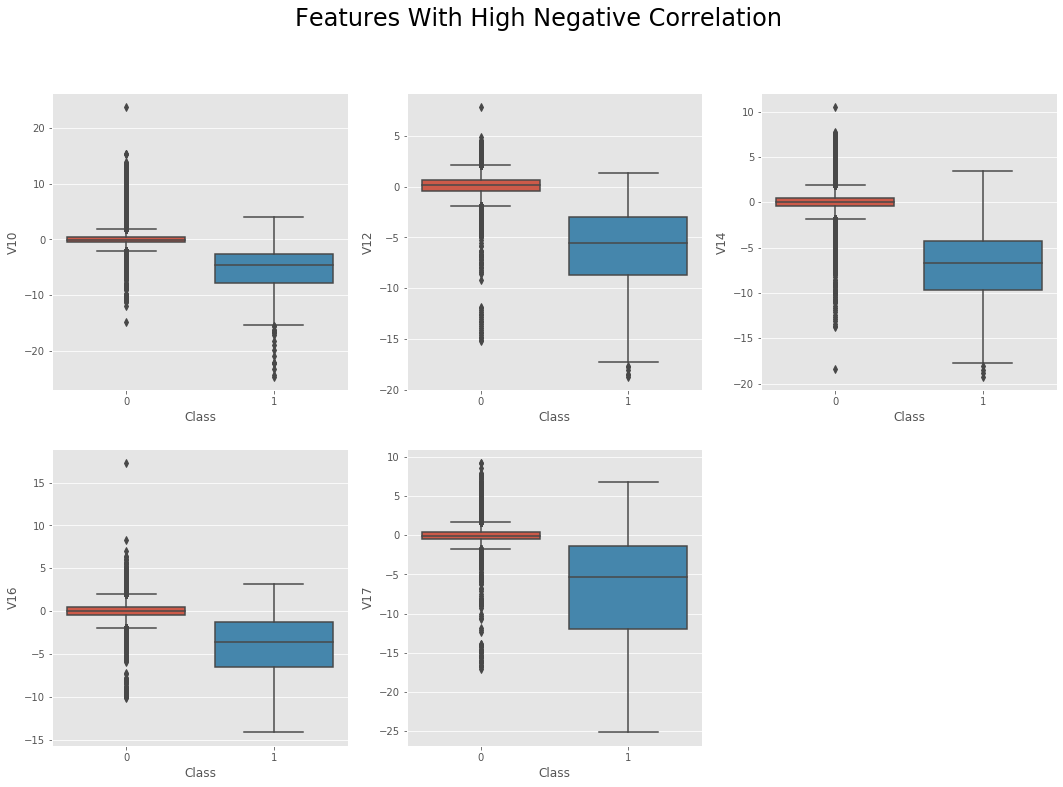

In [15]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,12))

f.suptitle('Features With High Negative Correlation', size=24)
sns.boxplot(x="Class", y="V10", data=df, ax=axes[0,0])
sns.boxplot(x="Class", y="V12", data=df, ax=axes[0,1])
sns.boxplot(x="Class", y="V14", data=df, ax=axes[0,2])
sns.boxplot(x="Class", y="V16", data=df, ax=axes[1,0])
sns.boxplot(x="Class", y="V17", data=df, ax=axes[1,1])
f.delaxes(axes[1,2])

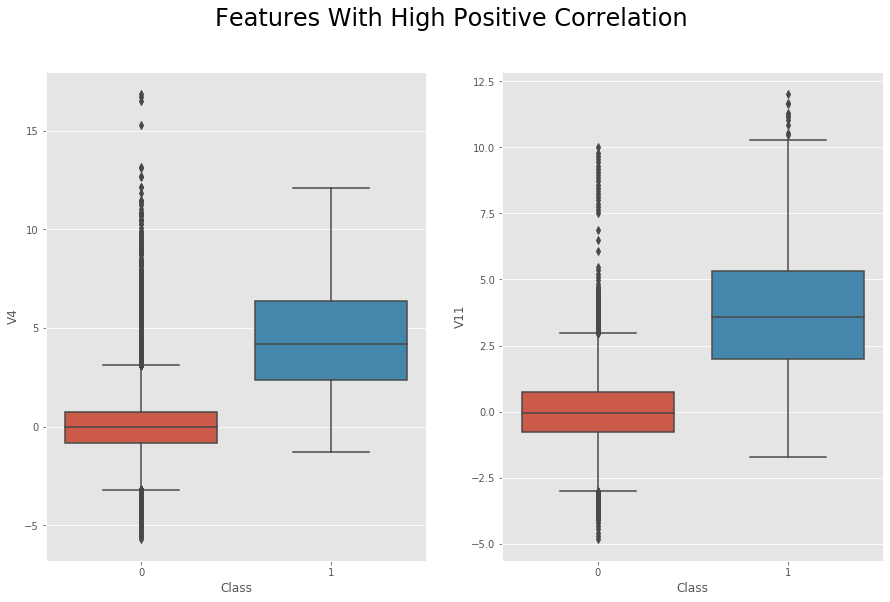

In [16]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,9))

f.suptitle('Features With High Positive Correlation', size=24)
sns.boxplot(x="Class", y="V4", data=df, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=df, ax=axes[1])

*Summary of the credit card transaction dataset:* 

* The variables are unnamed, because we are not working with original credit card data but with variables that have been orthogonally transformed into uncorrelated variables (principal components). 

* There are 29 variables of type float and 1 variable of type integer. The former are the principal component that we can use as features, and the latter is the binary response variable indicating the transaction anomalies. 

* The number of anomalies is very small compared to the total number of transactions collected over the course of two days. In other words, the dataset is highly unbalanced, and this requires special attention when we build a classifier to predict anomalies in the transaction data. 

* Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

## 3.1.1 Logistic Regression

Predicting anomalies is a binary classification problem. We assume that a transaction represents either an anomaly (1) or not (0), but never both. Logistic Regression is a good starting point for this type of classification because it is fast, and still allows us to explain what variables are influential. (While this is always the case, note that our variables are **PCAs meaning that their influence does not give us any information**.) We will follow a step-wise approach: 

1. Split the data into a training set and a testing (or hold-out) set; 
2. Scale and center the data; 
3. Fit an initial classifier: 
    * Use default parameters; 
    * Predict (non)anomalous transactions;  
    * Evaluate initial classifier; 
4. Hyperparameter tuning of classifier with k-fold cross-validation: 
    * Identify optimized parameter set for classifier; 
    * Predict (non)anomalous transactions; 
    * Evaluate optimized classifier.

### Notes on using StandardScaler

StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in normal distribution. It is more useful in classification than regression. You can read this blog of mine.

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

Normalizer : It squeezes the data between 0 and 1. It performs normalization. Due to the decreased range and magnitude, the gradients in the training process do not explode and you do not get higher values of loss. Is more useful in regression than classification. You can read this blog of mine.

In [17]:
# Import modules
from inspect import signature
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, mean_squared_error, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [18]:
# Create training and testing sets
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state=21)

In [19]:
# Scale and center data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Instantiate classifier
clf = LogisticRegression(solver='lbfgs', max_iter=200, random_state=21)

# Fit classifier to the training set
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=21, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# Compute training metrics
accuracy = clf.score(X_train, y_train)

#  Predict labels of test set
train_pred = clf.predict(X_train)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_train, train_pred)
conf_mat = confusion_matrix(y_train.round(), train_pred.round())
clas_rep = classification_report(y_train.round(), train_pred.round())

# Print reports
print('{:=^80}'.format('Initial LR training report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

===========================Initial LR training report===========================
Accuracy: 0.9992
MSE: 0.0008
Confusion matrix:
[[198993     28]
 [   132    211]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199021
           1       0.88      0.62      0.73       343

    accuracy                           1.00    199364
   macro avg       0.94      0.81      0.86    199364
weighted avg       1.00      1.00      1.00    199364



In [22]:
# Compute testing metrics
accuracy = clf.score(X_test, y_test)

# Predict labels of test set
y_pred = clf.predict(X_test)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_test, y_pred)
conf_mat = confusion_matrix(y_test.round(), y_pred.round())
clas_rep = classification_report(y_test.round(), y_pred.round())

# Print reports
print('{:=^80}'.format('Initial LR testing report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

===========================Initial LR testing report============================
Accuracy: 0.9992
MSE: 0.0008
Confusion matrix:
[[85283    11]
 [   61    88]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.89      0.59      0.71       149

    accuracy                           1.00     85443
   macro avg       0.94      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



<table>
  <tr>
    <td></td>
    <td>Prediction: 0</td>
    <td>Prediction: 1</td>
  </tr>
  <tr>
    <td>Actual: 0 </td>
    <td>True negative</td>
    <td>False positive</td>
  </tr>
  <tr>
    <td>Actual: 1</td>
    <td>False negative</td>
    <td>True positive</td>
  </tr>
</table> 

* Precision = tp / (tp + fp) 
* Recall = tp / (tp + fn) 
* F-beta score = 2 * (precision * recall) / (precision + recall) 

The classification report (above) shows that the accuracy of the model is outstanding (close to 1.00). But this does not mean this a good model. Why? The vast majority - 99.83% of the transactions are not marked as anomalies in the dataset. An alternative model would simply classify all values as 0 (not anomalous), and still have an accuracy of 1.00 (98.83% to be exact). Despite the fact that this classifier has a very high accuracy and a very low mean squared error, we need to evaluate the metrics that reflect the fact that this dataset is highly unbalanced. We want to focus particularly on the class of interest: anomalous transactions. The recall rate for anomalies (value 1), is not indeed very high (0.59). While the precision for anomalies (0.89) is a good result for an uncalibrated model, the confusion matrix shows that we incorrectly classified 61 transactions as anomalous.

AUC: 0.9829062620044716


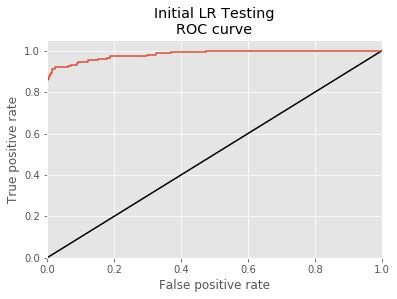

In [23]:
# Compute predicted probabilities
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Calculate receiver operating characteristics (ROC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k-')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Initial LR Testing\nROC curve')
plt.show()

AUPRC: 0.7805894031351092


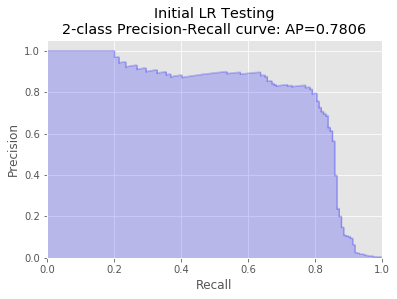

In [24]:
# Compute AUPRC score
average_precision = average_precision_score(y_test, y_pred_prob)
print("AUPRC: {}".format(average_precision))

# Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Initial LR Testing\n2-class Precision-Recall curve: AP={0:0.4f}'.format(average_precision))
plt.show()

Again, we see that metrics like area under ROC curve and accuracy (above) give a too optimistic impression of model performance. To reflect the unbalanced character of the credit card transaction data (0.1727% of the transactions were anomalous and 99.8273‬% were not anomalous), we also plotted the Precision-Recall curve. The area under the Precision-Recall curve (AUPRC) is a useful metric: if we had to assign this model a grade, 78/100 would be it. Not bad, but still much unexploited potential.

### 3.1.2 LR hyperparameter tuning

To improve the performance of the Logistic Regression classifier, we will calibrate its main parameter C with a random grid search. The C-parameter fixes the inverse of regularization strength, and setting this parameter to a smaller value will increase the regularization strength.

In [25]:
# Define hyperparameter grid
c_space = np.logspace(-3, 2, 51)
rand_grid = {'C': c_space,
             'solver': ['lbfgs'] }
print(rand_grid)

# Instantiate search object (use all cores but one)
grid = RandomizedSearchCV(LogisticRegression(random_state=21, max_iter=100), rand_grid,
                          n_iter = 20, cv=2, random_state=21, n_jobs = -2, verbose = 2)

# Fit object to data
grid.fit(X_train, y_train)

# Extract best model
optimized_clf = grid.best_estimator_

{'C': array([1.00000000e-03, 1.25892541e-03, 1.58489319e-03, 1.99526231e-03,
       2.51188643e-03, 3.16227766e-03, 3.98107171e-03, 5.01187234e-03,
       6.30957344e-03, 7.94328235e-03, 1.00000000e-02, 1.25892541e-02,
       1.58489319e-02, 1.99526231e-02, 2.51188643e-02, 3.16227766e-02,
       3.98107171e-02, 5.01187234e-02, 6.30957344e-02, 7.94328235e-02,
       1.00000000e-01, 1.25892541e-01, 1.58489319e-01, 1.99526231e-01,
       2.51188643e-01, 3.16227766e-01, 3.98107171e-01, 5.01187234e-01,
       6.30957344e-01, 7.94328235e-01, 1.00000000e+00, 1.25892541e+00,
       1.58489319e+00, 1.99526231e+00, 2.51188643e+00, 3.16227766e+00,
       3.98107171e+00, 5.01187234e+00, 6.30957344e+00, 7.94328235e+00,
       1.00000000e+01, 1.25892541e+01, 1.58489319e+01, 1.99526231e+01,
       2.51188643e+01, 3.16227766e+01, 3.98107171e+01, 5.01187234e+01,
       6.30957344e+01, 7.94328235e+01, 1.00000000e+02]), 'solver': ['lbfgs']}
Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-2)]: Done  40 out of  40 | elapsed:   11.6s finished


In [26]:
# Print the tuned parameters and score
print('{:=^80}'.format('LR parameters for best candidate'))
print("Optimized Parameters: {}".format(grid.best_params_)) 
print("All Parameters: {}".format(optimized_clf.get_params())) 
print("Best score is {}".format(grid.best_score_))

========================LR parameters for best candidate========================
Optimized Parameters: {'solver': 'lbfgs', 'C': 0.12589254117941676}
All Parameters: {'C': 0.12589254117941676, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': 21, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best score is 0.9991723681306555


In [27]:
# Compute training metrics
accuracy = optimized_clf.score(X_train, y_train)

#  Predict labels of test set
train_pred = optimized_clf.predict(X_train)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_train, train_pred)
conf_mat = confusion_matrix(y_train.round(), train_pred.round())
clas_rep = classification_report(y_train.round(), train_pred.round())

# Print reports
print('{:=^80}'.format('Optimized LR training report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

==========================Optimized LR training report==========================
Accuracy: 0.9992
MSE: 0.0008
Confusion matrix:
[[198993     28]
 [   133    210]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199021
           1       0.88      0.61      0.72       343

    accuracy                           1.00    199364
   macro avg       0.94      0.81      0.86    199364
weighted avg       1.00      1.00      1.00    199364



In [28]:
# Compute testing metrics
accuracy = optimized_clf.score(X_test, y_test)

# Predict labels of test set
y_pred = optimized_clf.predict(X_test)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_test, y_pred)
conf_mat = confusion_matrix(y_test.round(), y_pred.round())
clas_rep = classification_report(y_test.round(), y_pred.round())

# Print reports
print('{:=^80}'.format('Optimized LR testing report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

==========================Optimized LR testing report===========================
Accuracy: 0.9991
MSE: 0.0009
Confusion matrix:
[[85283    11]
 [   62    87]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.89      0.58      0.70       149

    accuracy                           1.00     85443
   macro avg       0.94      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443



AUC: 0.9839071428110556


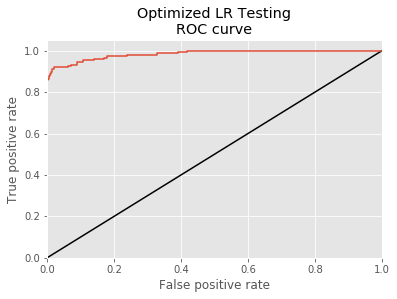

In [29]:
# Compute predicted probabilities
y_pred_prob = optimized_clf.predict_proba(X_test)[:,1]

# Calculate receiver operating characteristics (ROC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k-')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Optimized LR Testing\nROC curve')
plt.show()

AUPRC: 0.7821883145333293


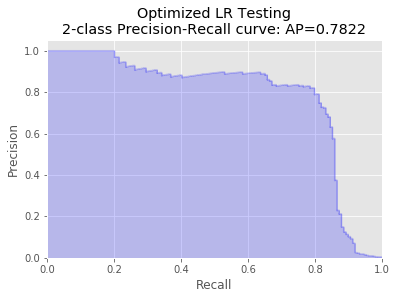

In [30]:
# Compute AUPRC score
average_precision = average_precision_score(y_test, y_pred_prob)
print("AUPRC: {}".format(average_precision))

# Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Optimized LR Testing\n2-class Precision-Recall curve: AP={0:0.4f}'.format(average_precision))
plt.show()

*Logistic Regression final performance (above):* The model performance indicated by the AUPRC metric (area under Precision-Recall curve) did not improve substantially in comparison to the initial model, so it is time to try a different classifier.

## 3.2.1 Gradient Boosting Model (GBM) classification

Gradient Boosting builds an additive model in a forward step-wise approach, by fitting a single regression tree (in binary classification) that optimizes the deviance loss function. As such, a GBM combines both parametric and non-parametric methods.

In [31]:
# Import modules
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
# Instantiate classifier
clf = GradientBoostingClassifier(random_state=21, verbose=1)

# Fit classifier to the training set
clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.0237            1.18m
         2 24424088907.7394            1.18m
         3 24424088907.7335            1.12m
         4 24424088442.4370            1.11m
         5 24424088442.4367            1.07m
         6 24424088442.4364            1.04m
         7 24424088442.4363            1.01m
         8 24424088442.4362           59.39s
         9 24424088442.4361           59.30s
        10 24424088442.4360           59.02s
        20 24424088442.4355           52.33s
        30 56129462269099936881573888.0000           44.68s
        40 56129462269099936881573888.0000           38.12s
        50 56129462269099936881573888.0000           31.46s
        60 56129462269099936881573888.0000           25.41s
        70 56129462269099936881573888.0000           19.28s
        80 56129462269099936881573888.0000           12.78s
        90 56129462269099936881573888.0000            6.29s
       100 56129462269099936881573888.0

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=21, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [33]:
# Compute training metrics
accuracy = clf.score(X_train, y_train)

#  Predict labels of test set
train_pred = clf.predict(X_train)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_train, train_pred)
conf_mat = confusion_matrix(y_train.round(), train_pred.round())
clas_rep = classification_report(y_train.round(), train_pred.round())

# Print reports
print('{:=^80}'.format('Initial SVC training report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

==========================Initial SVC training report===========================
Accuracy: 0.9992
MSE: 0.0008
Confusion matrix:
[[198998     23]
 [   132    211]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199021
           1       0.90      0.62      0.73       343

    accuracy                           1.00    199364
   macro avg       0.95      0.81      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [34]:
# Compute testing metrics
accuracy = clf.score(X_test, y_test)

# Predict labels of test set
y_pred = clf.predict(X_test)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_test, y_pred)
conf_mat = confusion_matrix(y_test.round(), y_pred.round())
clas_rep = classification_report(y_test.round(), y_pred.round())

# Print reports
print('{:=^80}'.format('Initial GBM testing report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

===========================Initial GBM testing report===========================
Accuracy: 0.9993
MSE: 0.0007
Confusion matrix:
[[85284    10]
 [   51    98]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.91      0.66      0.76       149

    accuracy                           1.00     85443
   macro avg       0.95      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443



AUC: 0.8070295116630154


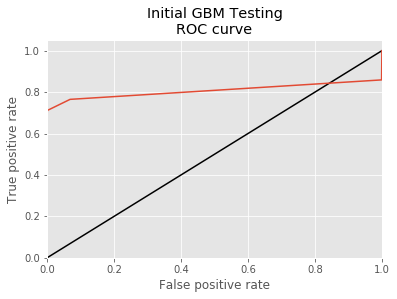

In [35]:
# Compute predicted probabilities
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Calculate receiver operating characteristics (ROC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k-')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Initial GBM Testing\nROC curve')
plt.show()

AUPRC: 0.6392519105493971


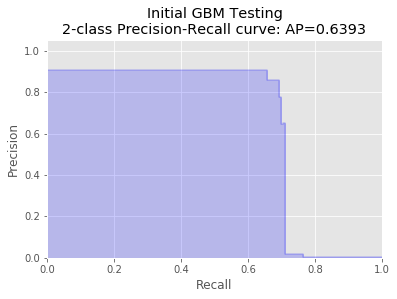

In [36]:
# Compute AUPRC score
average_precision = average_precision_score(y_test, y_pred_prob)
print("AUPRC: {}".format(average_precision))

# Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Initial GBM Testing\n2-class Precision-Recall curve: AP={0:0.4f}'.format(average_precision))
plt.show()

### 3.2.2 GBM hyperparameter tuning

In [37]:
# Define hyperparameter grid
learning_rate = [0.02, 0.1]
n_estimators = [int(x) for x in [100, 200, 300, 400]]
subsample = [0.5, 0.9]
max_depth = [int(x) for x in [3, 4, 5, 10]]
min_samples_split = [int(x) for x in [2, 3, 4, 5]]
rand_grid = {'learning_rate': learning_rate,
             'n_estimators': n_estimators,
             'subsample': subsample,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split}
print(rand_grid)

{'learning_rate': [0.02, 0.1], 'n_estimators': [100, 200, 300, 400], 'subsample': [0.5, 0.9], 'max_depth': [3, 4, 5, 10], 'min_samples_split': [2, 3, 4, 5]}


In [38]:
# Instantiate RandomizedSearchCV object (use all cores but one)
grid = RandomizedSearchCV(GradientBoostingClassifier(validation_fraction=0.3, n_iter_no_change=10, random_state=21), rand_grid, 
                          n_iter = 20, cv=2, random_state=21, n_jobs = -2, verbose = 2)

# Fit object to data
grid.fit(X_train, y_train)

# Extract best model
optimized_clf = grid.best_estimator_

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-2)]: Done  40 out of  40 | elapsed:  2.9min finished


In [39]:
# Print the tuned parameters and score
print('{:=^80}'.format('GBM parameters for best candidate'))
print("Optimized Parameters: {}".format(grid.best_params_)) 
print("All Parameters: {}".format(optimized_clf.get_params())) 
print("Best score is {}".format(grid.best_score_))

=======================GBM parameters for best candidate========================
Optimized Parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 4, 'learning_rate': 0.02}
All Parameters: {'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.02, 'loss': 'deviance', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_iter_no_change': 10, 'presort': 'auto', 'random_state': 21, 'subsample': 0.9, 'tol': 0.0001, 'validation_fraction': 0.3, 'verbose': 0, 'warm_start': False}
Best score is 0.9992626552436749


In [40]:
# Compute training metrics
accuracy = optimized_clf.score(X_train, y_train)

#  Predict labels of test set
train_pred = optimized_clf.predict(X_train)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_train, train_pred)
conf_mat = confusion_matrix(y_train.round(), train_pred.round())
clas_rep = classification_report(y_train.round(), train_pred.round())

# Print reports
print('{:=^80}'.format('Optimized GBM training report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

=========================Optimized GBM training report==========================
Accuracy: 0.9995
MSE: 0.0005
Confusion matrix:
[[198997     24]
 [    67    276]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199021
           1       0.92      0.80      0.86       343

    accuracy                           1.00    199364
   macro avg       0.96      0.90      0.93    199364
weighted avg       1.00      1.00      1.00    199364



In [41]:
# Compute testing metrics
accuracy = optimized_clf.score(X_test, y_test)

# Predict labels of test set
y_pred = optimized_clf.predict(X_test)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_test, y_pred)
conf_mat = confusion_matrix(y_test.round(), y_pred.round())
clas_rep = classification_report(y_test.round(), y_pred.round())

# Print reports
print('{:=^80}'.format('Optimized GBM testing report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

==========================Optimized GBM testing report==========================
Accuracy: 0.9994
MSE: 0.0006
Confusion matrix:
[[85280    14]
 [   41   108]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.89      0.72      0.80       149

    accuracy                           1.00     85443
   macro avg       0.94      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



AUC: 0.89534174178125


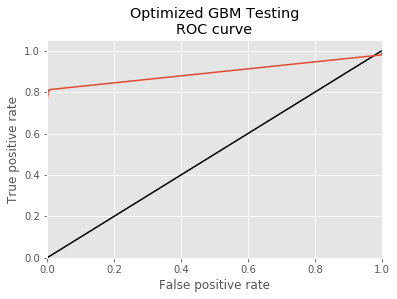

In [42]:
# Compute predicted probabilities
y_pred_prob = optimized_clf.predict_proba(X_test)[:,1]

# Calculate receiver operating characteristics (ROC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k-')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Optimized GBM Testing\nROC curve')
plt.show()

AUPRC: 0.716365268143389


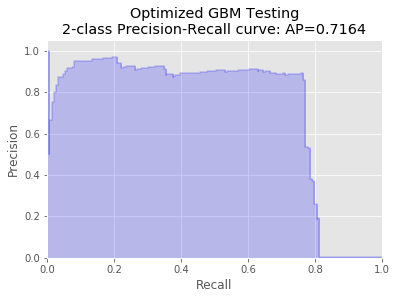

In [43]:
# Compute AUPRC score
average_precision = average_precision_score(y_test, y_pred_prob)
print("AUPRC: {}".format(average_precision))

# Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Optimized GBM Testing\n2-class Precision-Recall curve: AP={0:0.4f}'.format(average_precision))
plt.show()

With an AUPRC of 0.7164 (above), the gradient boosting model performed worse than both the LR classifier. Lower performance is mostly explained by the lower recall for anomalies (value 1). While the GBM was on point for the anomalies it identified, it also missed a large percentage of anomalies--at least more than the LR classifier. 

## 3.3.1 Random Forest (RF) classification

Until now we used LR, Kernel SVC and GBM to make predictions, and all three have limitations when it comes to classification of unbalanced data. LR is a special case of generalized linear model (GLM) and makes assumptions about the underlying data distribution. This method works best with uncorrelated data and logarithmic error distributions, and therefore requires many data samples for fitting. Kernel SVC fitting involves the computation of polynomial surfaces, and the nonlinear nature of polynomial calculations makes that Kernel SVCs are not easily parallelized. GBM builds trees one at a time, each attempting to explain the residual error of the previous tree. While this can work for balanced datasets, the sequential nature of this process can be a disadvantage. 

Random Forest (RF) classification offers a non-parametric approach where a large number of uncorrelated models (decision trees) are fitted to the data, and vote independently as a joint committee on what the outcome of each prediction should be. One advantage of RF is that it makes no assumptions about the sample distribution or error distribution, meaning the classifier is robust and not biased by outliers. Furthermore, RF can be parallelized into as many processes as there are estimators (trees). Because a RF calculates fast, we will not hypertune the parameters but instead allow it to fit the data without constraints. 

In [44]:
# Import modules
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Fit random forest for range of maximum depth of tree 
max_depths = [int(x) for x in [2,4,8,16,32,64]]

train_results = []
test_results = []
for max_depth in max_depths:
    clf = RandomForestClassifier(max_depth=max_depth, n_estimators=100, random_state=21, n_jobs = -2)
    clf.fit(X_train, y_train)
    train_pred_prob = clf.predict_proba(X_train)[:,1]
    average_precision = average_precision_score(y_train, train_pred_prob)
    train_results.append(average_precision)
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    average_precision = average_precision_score(y_test, y_pred_prob)
    test_results.append(average_precision)

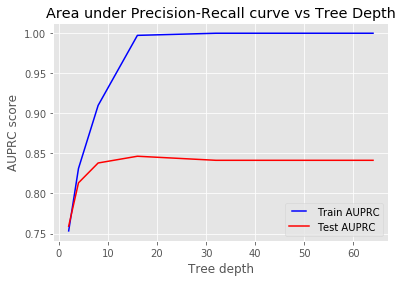

In [46]:
# Plot AUPRC vs tree depth
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUPRC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUPRC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUPRC score')
plt.xlabel('Tree depth')
plt.title('Area under Precision-Recall curve vs Tree Depth')
plt.show()

The maximum area under the Precision-Recall curve (AUPRC) is reached for a tree depth less than 20. It appears that an AUPRC of ~0.84 is the best possible testing performance we may expect given a training AUPRC of close to 1.00.

### 3.3.2 Random Forest without constraints

In [47]:
# Import modules
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Zero ratios
y_train_s = np.prod(y_train.shape)
y_train_z = (y_train_s - np.sum(y_train)) / y_train_s
y_test_s = np.prod(y_test.shape)
y_test_z = (y_test_s - np.sum(y_test)) / y_test_s
print("Zero ratio in training labels: {}".format(y_train_z))
print("Zero ratio in testing labels: {}".format(y_test_z))

Zero ratio in training labels: 0.9982795289019081
Zero ratio in testing labels: 0.9982561473731025


In [49]:
# Compute sample weights for unbalanced classes as inverse of probability
weight_0 = 1.0
weight_1 = (1 - y_train_z)**-1
sample_weight = np.array([weight_1 if i == 1 else weight_0 for i in enumerate(y_train)])
print("Sample weight for logical(0): {}".format(weight_0))
print("Sample weight for logical(1): {}".format(weight_1))

Sample weight for logical(0): 1.0
Sample weight for logical(1): 581.2361516035012


In [50]:
# Instantiate classifier
clf = RandomForestClassifier(n_estimators=200, random_state=21, n_jobs = -2, verbose = 2)

# Fit classifier to training set
clf = clf.fit(X_train, y_train, sample_weight=sample_weight)

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200


[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:   18.5s


building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80

[Parallel(n_jobs=-2)]: Done 156 tasks      | elapsed:  1.4min


building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:  1.8min finished


In [51]:
# Compute training metrics
accuracy = clf.score(X_train, y_train)

#  Predict labels of test set
train_pred = clf.predict(X_train)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_train, train_pred)
conf_mat = confusion_matrix(y_train.round(), train_pred.round())
clas_rep = classification_report(y_train.round(), train_pred.round())

# Print reports
print('{:=^80}'.format('RF training report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    1.1s finished


===============================RF training report===============================
Accuracy: 1.0000
MSE: 0.0000
Confusion matrix:
[[199021      0]
 [     0    343]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199021
           1       1.00      1.00      1.00       343

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [52]:
# Compute testing metrics
accuracy = clf.score(X_test, y_test)

# Predict labels of test set
y_pred = clf.predict(X_test)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_test, y_pred)
conf_mat = confusion_matrix(y_test.round(), y_pred.round())
clas_rep = classification_report(y_test.round(), y_pred.round())

# Print reports
print('{:=^80}'.format('RF testing report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.5s finished


===============================RF testing report================================
Accuracy: 0.9995
MSE: 0.0005
Confusion matrix:
[[85288     6]
 [   36   113]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.95      0.76      0.84       149

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [53]:
# Compute predicted probabilities
y_pred_prob = clf.predict_proba(X_test)[:,1]

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.5s finished


AUC: 0.950323814841457


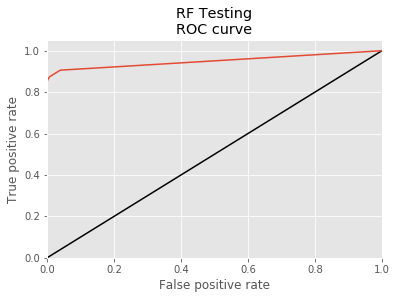

In [54]:
# Calculate receiver operating characteristics (ROC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k-')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('RF Testing\nROC curve')
plt.show()

AUPRC: 0.8456257031199099


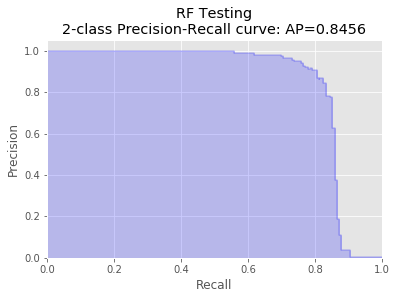

In [55]:
# Compute AUPRC score
average_precision = average_precision_score(y_test, y_pred_prob)
print("AUPRC: {}".format(average_precision))

# Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('RF Testing\n2-class Precision-Recall curve: AP={0:0.4f}'.format(average_precision))
plt.show()

## 3.3.3 Model selection and cost-effective optimization

*Selecting the best classifier:* We have tested four classifiers: Logistic Regression, Kernel Support Vector Classifier, Stochastic Gradient Boosting and Random Forest. Which one is the best choice? A practical way to evaluate the suitability of a classifier for daily use is in terms of cost-effectiveness: we want the classifier to be able to make predictions on new data (high testing precision and recall), and at a low cost (fast computation and modest data requirements). 

The Random Forest (AUPRC=0.8456) performed best in terms of precision and recall, followed by Kernel Support Vector Classifier (AUPRC=0.8081), Logistic Regression (AUPRC=0.7822) and Stochastic Gradient Boosting Machine (AUPRC=0.7164). RF and LR computed fastest. Conversely, Kernel SVC used the most computer time. While in a real-world scenario we might be able to obtain a better model (probably SGB or RF) given enough training data and more iterations, we assume that RF provides the most cost-effective prediction of transaction anomalies for now. 

### Feature importance

Now that we have identified the RF as the most suitable model to predict transaction anomalies, the next step is to see if can improve its cost-effectiveness by reducing data requirements. We trained the model on 29 features, so let's find out which of those features contribute the most information to the prediction. 

In [56]:
# Get feature importances
feature_list = list(df.columns[:-1])
importances = list(clf.feature_importances_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print feature ranking
print("Feature ranking:")
_ = [print('Variable: {:3} Importance: {}'.format(*pair)) for pair in feature_importances]

Feature ranking:
Variable: V17 Importance: 0.1987
Variable: V12 Importance: 0.1125
Variable: V14 Importance: 0.1028
Variable: V11 Importance: 0.0793
Variable: V16 Importance: 0.0717
Variable: V10 Importance: 0.069
Variable: V9  Importance: 0.0351
Variable: V18 Importance: 0.0286
Variable: V4  Importance: 0.0259
Variable: V7  Importance: 0.0252
Variable: V26 Importance: 0.0202
Variable: V3  Importance: 0.0164
Variable: V21 Importance: 0.0155
Variable: V1  Importance: 0.0153
Variable: V6  Importance: 0.0152
Variable: V27 Importance: 0.0145
Variable: V2  Importance: 0.0142
Variable: V19 Importance: 0.0142
Variable: Time Importance: 0.0141
Variable: V20 Importance: 0.0132
Variable: V5  Importance: 0.0123
Variable: V15 Importance: 0.0123
Variable: V8  Importance: 0.0122
Variable: V22 Importance: 0.0117
Variable: V28 Importance: 0.0113
Variable: V13 Importance: 0.011
Variable: V24 Importance: 0.0105
Variable: V25 Importance: 0.0088
Variable: V23 Importance: 0.0082


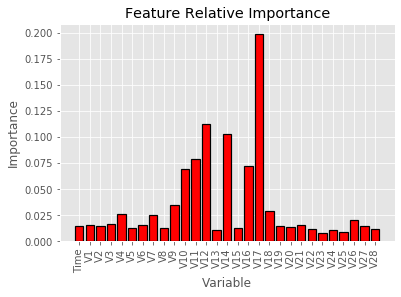

In [57]:
# Plot feature ranking in bar chart
X_values = list(range(len(importances)))
plt.bar(X_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(X_values, feature_list, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Feature Relative Importance')
plt.show()

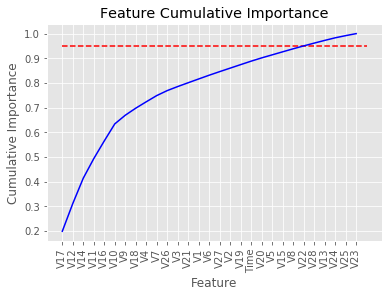

In [58]:
# List of features sorted by decreasing importance
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importance
cumulative_importances = np.cumsum(sorted_importances)

# Create line plot
plt.plot(X_values, cumulative_importances, 'b-')
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(X_values, sorted_features, rotation = 'vertical')
plt.xlabel('Feature')
plt.ylabel('Cumulative Importance')
plt.title('Feature Cumulative Importance')
plt.show()

In [59]:
# Number of features explaining 95% cum. importance
n_import = np.where(cumulative_importances > 0.95)[0][0] + 1
print('Number of features required (95% importance):', n_import)

# Least important features
limp_feature_names = sorted_features[-(len(importances)-n_import):]
print('Least important features (5% importance):', limp_feature_names)

Number of features required (95% importance): 24
Least important features (5% importance): ['V28', 'V13', 'V24', 'V25', 'V23']


Feature importance analysis (above) shows that 24 features out of the available set of 29 features account for 95% of the Gini Importance. There are three things we learn from this: 

1. There is a relative lack of correlation between features, confirming that these are indeed orthogonally transformed data (in this case the outcome of principal component analysis); 
2. The RF classifier makes optimum use of the training data; 
3. We can drop 5 of the features without incurring a high cost to model performance, namely the PCAs labeled as 28, 13, 24, 25 and 23. 

### 3.3.4 Retrain RF classifier on the most important features

In [60]:
# Extract the names of most important features
important_feature_names = [feature[0] for feature in feature_importances[0:(n_import - 1)]]

# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only important features
X_train_imp = X_train[:,important_indices]
X_test_imp = X_test[:,important_indices]

# Print dimensions
print("Dimensions of X_train_imp: {}".format(X_train_imp.shape))
print("Dimensions of y_train_imp: {}".format(y_train.shape))
print("Dimensions of X_test_imp: {}".format(X_test_imp.shape))
print("Dimensions of y_test_imp: {}".format(y_test.shape))

Dimensions of X_train_imp: (199364, 23)
Dimensions of y_train_imp: (199364,)
Dimensions of X_test_imp: (85443, 23)
Dimensions of y_test_imp: (85443,)


In [61]:
# Fit classifier to training set
clf = clf.fit(X_train_imp, y_train, sample_weight=sample_weight)

building tree 1 of 200building tree 2 of 200

building tree 3 of 200


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200


[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:   14.3s


building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79

[Parallel(n_jobs=-2)]: Done 156 tasks      | elapsed:  1.0min


building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:  1.4min finished


In [62]:
# Compute training metrics
accuracy = clf.score(X_train_imp, y_train)

#  Predict labels of test set
train_pred = clf.predict(X_train_imp)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_train, train_pred)
conf_mat = confusion_matrix(y_train.round(), train_pred.round())
clas_rep = classification_report(y_train.round(), train_pred.round())

# Print reports
print('{:=^80}'.format('New RF training report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    1.1s finished


=============================New RF training report=============================
Accuracy: 1.0000
MSE: 0.0000
Confusion matrix:
[[199021      0]
 [     0    343]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199021
           1       1.00      1.00      1.00       343

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [63]:
# Compute testing metrics
accuracy = clf.score(X_test_imp, y_test)

# Predict labels of test set
y_pred = clf.predict(X_test_imp)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_test, y_pred)
conf_mat = confusion_matrix(y_test.round(), y_pred.round())
clas_rep = classification_report(y_test.round(), y_pred.round())

# Print reports
print('{:=^80}'.format('New RF testing report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.5s finished


=============================New RF testing report==============================
Accuracy: 0.9995
MSE: 0.0005
Confusion matrix:
[[85287     7]
 [   37   112]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.94      0.75      0.84       149

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [64]:
# Compute predicted probabilities
y_pred_prob = clf.predict_proba(X_test_imp)[:,1]

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.5s finished


AUPRC: 0.8486548057918583


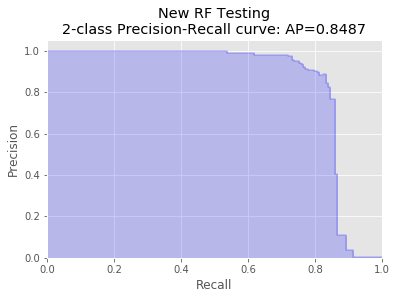

In [65]:
# Compute AUPRC score
average_precision = average_precision_score(y_test, y_pred_prob)
print("AUPRC: {}".format(average_precision))

# Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('New RF Testing\n2-class Precision-Recall curve: AP={0:0.4f}'.format(average_precision))
plt.show()

The testing AUPRC has not decreased after retraining the RF with the 24 most important of 29 features. We now have a more cost-effective RF classifier that has the same predictive power, but requires less data to train. These are the final scores:  
 
<table>
  <tr>
    <th>Classifier</th>
    <th>AUPRC</th>
  </tr>
  <tr>
    <td>Random Forest (24 most important features)</td>
    <td>0.8487</td>
  </tr>
  <tr>
    <td>Random Forest (all 29 features)</td>
    <td>0.8456</td>
  </tr>
  <tr>
    <td>Kernel Support Vector Classifier</td>
    <td>0.8081</td>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>0.7822</td>
  </tr>
  <tr>
    <td>Stochastic Boosted Regression</td>
    <td>0.7164</td>
  </tr>
</table> 

## 3.4.1 XGBoost

In [66]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=42)
clf = XGBClassifier(objective ='reg:logistic')
cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='roc_auc')
print('XGB ROCAUC on validation data: {0:.5f} {1:.5f}'.format(cv_results.mean(), cv_results.std()))

XGB ROCAUC on validation data: 0.97667 0.01764


In [67]:
# Fit classifier to the training set
clf.fit(X_train, y_train)

# Compute training metrics
accuracy = clf.score(X_train, y_train)

#  Predict labels of test set
train_pred = clf.predict(X_train)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_train, train_pred)
conf_mat = confusion_matrix(y_train.round(), train_pred.round())
clas_rep = classification_report(y_train.round(), train_pred.round())

# Print reports
print('{:=^80}'.format('Initial SVC training report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

==========================Initial SVC training report===========================
Accuracy: 1.0000
MSE: 0.0000
Confusion matrix:
[[199021      0]
 [     0    343]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199021
           1       1.00      1.00      1.00       343

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [68]:
# Compute testing metrics
accuracy = clf.score(X_test, y_test)

# Predict labels of test set
y_pred = clf.predict(X_test)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_test, y_pred)
conf_mat = confusion_matrix(y_test.round(), y_pred.round())
clas_rep = classification_report(y_test.round(), y_pred.round())

# Print reports
print('{:=^80}'.format('Initial GBM testing report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

===========================Initial GBM testing report===========================
Accuracy: 0.9995
MSE: 0.0005
Confusion matrix:
[[85290     4]
 [   35   114]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.97      0.77      0.85       149

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443



AUPRC: 0.8466813423703226


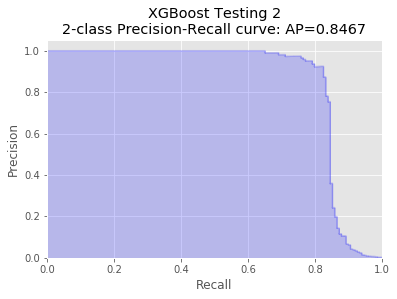

In [70]:
# Compute predicted probabilities
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Compute AUPRC score
average_precision = average_precision_score(y_test, y_pred_prob)
print("AUPRC: {}".format(average_precision))

# Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('XGBoost Testing 2\n2-class Precision-Recall curve: AP={0:0.4f}'.format(average_precision))
plt.show()

### 3.4.2 XGBoost with minor Hyperparameter Tuning

In [71]:
params = {
    'objective':'binary:logistic',
    "n_estimators":500,
    "max_depth":9,
    "learning_rate":0.05,
    "subsample":0.9,
    "colsample_bytree":0.9,
    "random_state":2019,
    "tree_method":'auto',
    "n_jobs":-1
}

In [72]:
imbalance_ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
params['scale_pos_weight'] = imbalance_ratio

In [73]:
# Training classifier
bst = XGBClassifier(**params).fit(X_train, y_train)

In [74]:
# Compute training metrics
accuracy = bst.score(X_train, y_train)

#  Predict labels of test set
train_pred = bst.predict(X_train)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_train, train_pred)
conf_mat = confusion_matrix(y_train.round(), train_pred.round())
clas_rep = classification_report(y_train.round(), train_pred.round())

# Print reports
print('{:=^80}'.format('Initial SVC training report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

==========================Initial SVC training report===========================
Accuracy: 1.0000
MSE: 0.0000
Confusion matrix:
[[199021      0]
 [     0    343]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199021
           1       1.00      1.00      1.00       343

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [75]:
# Compute testing metrics
accuracy = bst.score(X_test, y_test)

# Predict labels of test set
y_pred = bst.predict(X_test)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_test, y_pred)
conf_mat = confusion_matrix(y_test.round(), y_pred.round())
clas_rep = classification_report(y_test.round(), y_pred.round())

# Print reports
print('{:=^80}'.format('Initial GBM testing report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

===========================Initial GBM testing report===========================
Accuracy: 0.9995
MSE: 0.0005
Confusion matrix:
[[85284    10]
 [   30   119]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.92      0.80      0.86       149

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



AUPRC: 0.8510283321285333


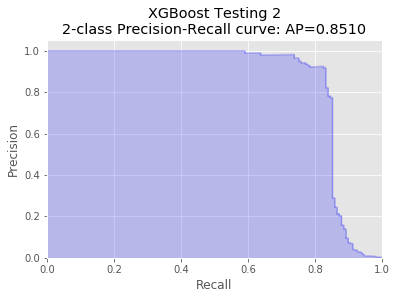

In [76]:
# Compute predicted probabilities
y_pred_prob = bst.predict_proba(X_test)[:,1]

# Compute AUPRC score
average_precision = average_precision_score(y_test, y_pred_prob)
print("AUPRC: {}".format(average_precision))

# Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('XGBoost Testing 2\n2-class Precision-Recall curve: AP={0:0.4f}'.format(average_precision))
plt.show()

### 3.4.3 XGBoost Hyperparameter Tuning with Hyperopt (Incomplete)
https://github.com/MiladShahidi/Fraud-Detection-XGBoost/blob/master/XGBoost_Fraud_Detection.ipynb
https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

In [77]:
params = {
    'objective':'binary:logistic',
    "n_estimators":500,
    "max_depth":9,
    "learning_rate":0.24,
    "subsample":0.92,
    "colsample_bytree":0.7,
    'eta': 0.6416600912978463,
    'gamma': 1.2898320900902265,
    'min_child_weight': 6.0,
    'reg_alpha': 0.6578578116881326,
    'reg_lambda': 0.5272026791760148,
    "random_state":2019,
    "tree_method":'auto',
    "n_jobs":-1
}

imbalance_ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
params['scale_pos_weight'] = imbalance_ratio

# Training classifier
bst = XGBClassifier(**params).fit(X_train, y_train)

In [78]:
# Compute training metrics
accuracy = bst.score(X_train, y_train)

#  Predict labels of test set
train_pred = bst.predict(X_train)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_train, train_pred)
conf_mat = confusion_matrix(y_train.round(), train_pred.round())
clas_rep = classification_report(y_train.round(), train_pred.round())

# Print reports
print('{:=^80}'.format('Initial SVC training report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

==========================Initial SVC training report===========================
Accuracy: 1.0000
MSE: 0.0000
Confusion matrix:
[[199017      4]
 [     0    343]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199021
           1       0.99      1.00      0.99       343

    accuracy                           1.00    199364
   macro avg       0.99      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [79]:
# Compute testing metrics
accuracy = bst.score(X_test, y_test)

# Predict labels of test set
y_pred = bst.predict(X_test)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_test, y_pred)
conf_mat = confusion_matrix(y_test.round(), y_pred.round())
clas_rep = classification_report(y_test.round(), y_pred.round())

# Print reports
print('{:=^80}'.format('Initial GBM testing report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

===========================Initial GBM testing report===========================
Accuracy: 0.9996
MSE: 0.0004
Confusion matrix:
[[85283    11]
 [   27   122]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.92      0.82      0.87       149

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



AUPRC: 0.8536801644068669


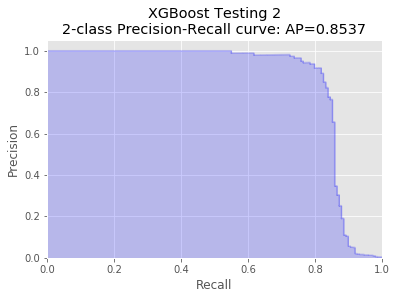

In [80]:
# Compute predicted probabilities
y_pred_prob = bst.predict_proba(X_test)[:,1]

# Compute AUPRC score
average_precision = average_precision_score(y_test, y_pred_prob)
print("AUPRC: {}".format(average_precision))

# Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('XGBoost Testing 2\n2-class Precision-Recall curve: AP={0:0.4f}'.format(average_precision))
plt.show()

## 3.5.1 LightGBM

In [81]:
# lightgbm version: 2.3.1
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(nthread=8,
                     #objective='logloss',
                     n_estimators=400,
                     num_leaves=45,
                     learning_rate=0.03,
                     subsample=1.0,
                     subsample_freq=1,
                     colsample_bytree=0.3,
                     min_child_samples=10)

lgb.fit(X_train, y_train, sample_weight=10**y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.3,
               importance_type='split', learning_rate=0.03, max_depth=-1,
               min_child_samples=10, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, nthread=8, num_leaves=45,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=1)

In [82]:
# Compute training metrics
accuracy = lgb.score(X_train, y_train)

#  Predict labels of test set
train_pred = lgb.predict(X_train)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_train, train_pred)
conf_mat = confusion_matrix(y_train.round(), train_pred.round())
clas_rep = classification_report(y_train.round(), train_pred.round())

# Print reports
print('{:=^80}'.format('Initial SVC training report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

==========================Initial SVC training report===========================
Accuracy: 1.0000
MSE: 0.0000
Confusion matrix:
[[199021      0]
 [     0    343]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199021
           1       1.00      1.00      1.00       343

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [83]:
# Compute testing metrics
accuracy = lgb.score(X_test, y_test)

# Predict labels of test set
y_pred = lgb.predict(X_test)

# Compute MSE, confusion matrix, classification report
mse = mean_squared_error(y_test, y_pred)
conf_mat = confusion_matrix(y_test.round(), y_pred.round())
clas_rep = classification_report(y_test.round(), y_pred.round())

# Print reports
print('{:=^80}'.format('Initial GBM testing report'))
print('Accuracy: %.4f' % accuracy)
print("MSE: %.4f" % mse)
print("Confusion matrix:\n{}".format(conf_mat))
print("Classification report:\n{}".format(clas_rep))

===========================Initial GBM testing report===========================
Accuracy: 0.9996
MSE: 0.0004
Confusion matrix:
[[85289     5]
 [   32   117]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.96      0.79      0.86       149

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



AUPRC: 0.8450088604095172


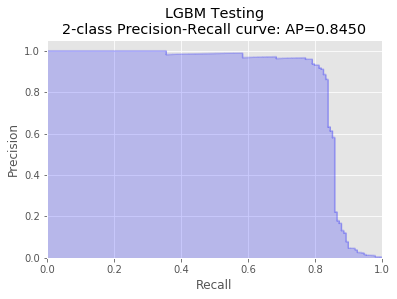

In [84]:
# Compute predicted probabilities
y_pred_prob = lgb.predict_proba(X_test)[:,1]

# Compute AUPRC score
average_precision = average_precision_score(y_test, y_pred_prob)
print("AUPRC: {}".format(average_precision))

# Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('LGBM Testing\n2-class Precision-Recall curve: AP={0:0.4f}'.format(average_precision))
plt.show()

--------------

## 3.6 Vanilla Model Comparisons without Hyperparameter Tuning (slow)

In [80]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html
# https://scikit-learn.org/stable/modules/model_evaluation.html

##Spot-Checking Algorithms
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = []

models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
# slow
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# slow
models.append(('SVM', SVC(gamma='scale')))
models.append(('XGB', XGBClassifier()))
models.append(('LGBM', XGBClassifier()))
# slow
models.append(('RF', RandomForestClassifier(n_estimators=200)))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    #cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='average_precision')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.750085 (0.034855)
LDA: 0.737293 (0.057689)
KNN: 0.808893 (0.057579)
CART: 0.562843 (0.079149)
SVM: 0.821545 (0.042362)
XGB: 0.861779 (0.048298)
LGBM: 0.861779 (0.048298)
RF: 0.845540 (0.048653)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


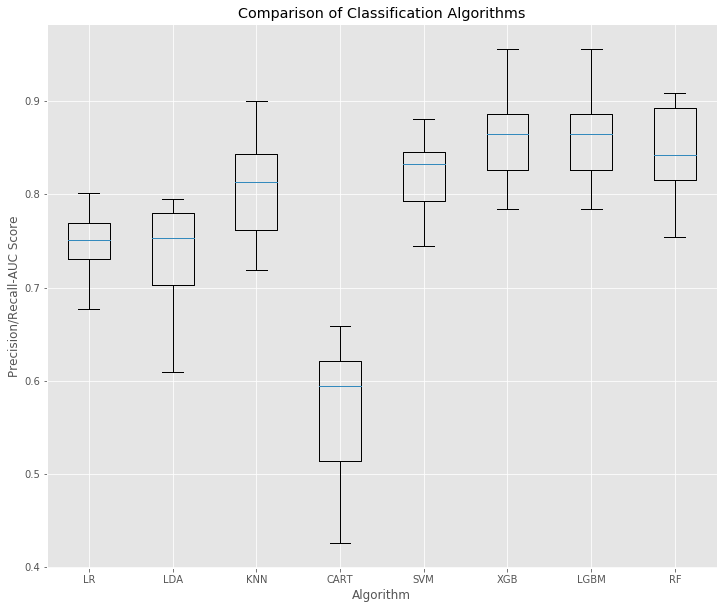

In [81]:
# Compare Algorithms
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Precision/Recall-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [82]:
results_f1 = []
names_f1 = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    #cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    cv_f1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    results_f1.append(cv_f1)
    names_f1.append(name)
    msg = '%s: %f (%f)' % (name, cv_f1.mean(), cv_f1.std())
    print(msg)

LR: 0.715674 (0.042302)
LDA: 0.817000 (0.047750)
KNN: 0.835726 (0.042534)
CART: 0.755729 (0.047247)
SVM: 0.766839 (0.057141)
XGB: 0.865025 (0.044069)
LGBM: 0.865025 (0.044069)
RF: 0.860488 (0.043102)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


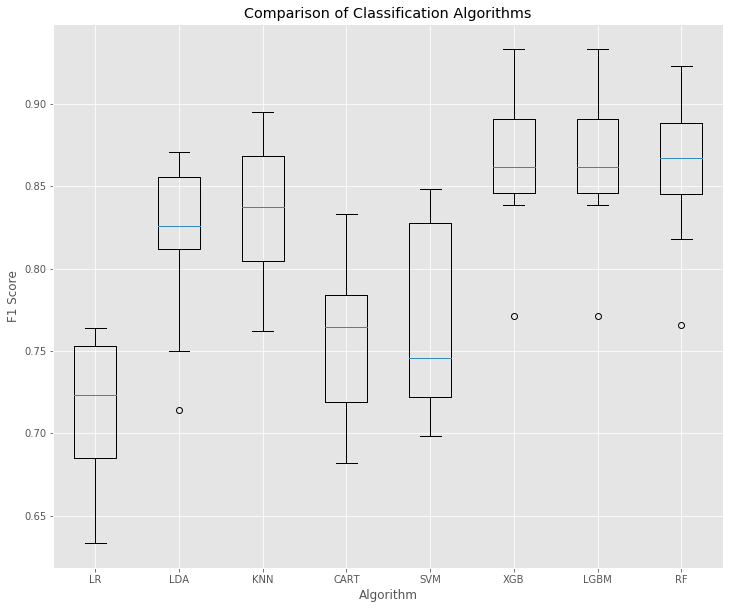

In [83]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')
plt.boxplot(results_f1)
ax = fig.add_subplot(111)
ax.set_xticklabels(names_f1)
plt.show()